Analizando la Satisfacción de Clientes en la Industria Hotelera

Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre la satisfacción de los clientes en la industria hotelera. Este análisis es crucial para los ejecutivos de la empresa que buscan entender mejor las opiniones y experiencias de sus clientes para mejorar los servicios ofrecidos.

El dataset puede ser encontrado aquí.

Limpieza de datos con Python:
-Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
-Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
-Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).
-Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
-Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).
Exploración de datos con Python:
-Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
-Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
Análisis adicional:
-Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
-Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [296]:
#Importando todas las librerias que podremos llegar a utilizar
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns


In [297]:
#Paso 1: Cargando el dataset
path = 'E:/Bootcamp/hotel/hotel_bookings.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Limpieza de datos con Python
### **Detección y eliminación de valores duplicados** 

Asegúrate de que cada registro en el dataset sea único

In [298]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()


Número de registros duplicados: 31994


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [299]:
#Eliminar datos duplicados
df = df.drop_duplicates()

### **Verificación y ajuste de tipos de datos**

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos
Fuente: clases/ds-fundamentals/pruebas-resueltas/videojuegos.ipynb

In [300]:
# Definir el diccionario de tipos de datos (excluyendo las fechas)
diccionario = {
    'hotel': 'string',
    'is_canceled': 'int64',
    'lead_time': 'int64',
    'arrival_date_year': 'int64',
    'arrival_date_month': 'string',
    'arrival_date_week_number': 'int64',
    'arrival_date_day_of_month': 'int64',
    'stays_in_weekend_nights': 'int64',
    'stays_in_week_nights': 'int64',
    'adults': 'int64',
    'children': 'float64', #como children posee valores nulos, utilizamos float64 para poder trabajar con dichos valores
    'babies': 'int64',
    'meal': 'string',
    'country': 'string',
    'market_segment': 'string',
    'distribution_channel': 'string',
    'is_repeated_guest': 'int64',
    'previous_cancellations': 'int64',
    'previous_bookings_not_canceled': 'int64',
    'reserved_room_type': 'string',
    'assigned_room_type': 'string',
    'booking_changes': 'int64',
    'deposit_type': 'string',
    'agent': 'string',
    'company': 'string',
    'days_in_waiting_list': 'int64',
    'customer_type': 'string',
    'adr': 'float64',
    'required_car_parking_spaces': 'int64',
    'total_of_special_requests': 'int64',
    'reservation_status': 'string',
    'reservation_status_date': 'date'
}


# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'int64': 'int64',
        'float64': 'float64',
        'date': 'datetime64[ns]'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)

Diccionario Mapeado para pandas:
{'hotel': 'string', 'is_canceled': 'int64', 'lead_time': 'int64', 'arrival_date_year': 'int64', 'arrival_date_month': 'string', 'arrival_date_week_number': 'int64', 'arrival_date_day_of_month': 'int64', 'stays_in_weekend_nights': 'int64', 'stays_in_week_nights': 'int64', 'adults': 'int64', 'children': 'float64', 'babies': 'int64', 'meal': 'string', 'country': 'string', 'market_segment': 'string', 'distribution_channel': 'string', 'is_repeated_guest': 'int64', 'previous_cancellations': 'int64', 'previous_bookings_not_canceled': 'int64', 'reserved_room_type': 'string', 'assigned_room_type': 'string', 'booking_changes': 'int64', 'deposit_type': 'string', 'agent': 'string', 'company': 'string', 'days_in_waiting_list': 'int64', 'customer_type': 'string', 'adr': 'float64', 'required_car_parking_spaces': 'int64', 'total_of_special_requests': 'int64', 'reservation_status': 'string', 'reservation_status_date': 'datetime64[ns]'}


In [301]:
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Algunos dtypes pueden ser equivalentes pero diferentes en nombre
            # Por ejemplo, 'string' en pandas puede ser 'string[python]'
            # Comparar solo las partes relevantes
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'hotel': Tipo actual -> object, Tipo esperado -> string
- Columna 'arrival_date_month': Tipo actual -> object, Tipo esperado -> string
- Columna 'meal': Tipo actual -> object, Tipo esperado -> string
- Columna 'country': Tipo actual -> object, Tipo esperado -> string
- Columna 'market_segment': Tipo actual -> object, Tipo esperado -> string
- Columna 'distribution_channel': Tipo actual -> object, Tipo esperado -> string
- Columna 'reserved_room_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'assigned_room_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'deposit_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'agent': Tipo actual -> float64, Tipo esperado -> string
- Columna 'company': Tipo actual -> float64, Tipo esperado -> string
- Columna 'customer_type': Tipo actual -> object, Tipo esperado -> string
- Columna 'reservation_status': Tipo actual -> object, Tipo esperado -> stri

In [302]:
def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df

# Corregir los tipos de datos
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Todos los tipos de datos han sido corregidos correctamente.


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  string        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  string        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87392 non-null  float64       
 11  babies

### **Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘yes’, ‘Yes’, ‘YES’).**

In [304]:
# Normalizar columnas categóricas
categorical_columns = [
    'meal', 'country', 'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 
    'customer_type', 'reservation_status'
]

for column in categorical_columns:
    df[column] = df[column].str.lower()  # Convertir a minúsculas
    df[column].replace({'null': np.nan}, inplace=True)  # Reemplazar 'NULL' por NaN

# Ver resultados
print(df)

C:\Users\chave\AppData\Local\Temp\ipykernel_19976\221677768.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace({'null': np.nan}, inplace=True)  # Reemplazar 'NULL' por NaN
C:\Users\chave\AppData\Local\Temp\ipykernel_19976\221677768.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

### **Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.**


In [305]:
# Identificar valores nulos
print("Valores nulos antes de manejar:")
print(df.isnull().sum())

# Manejar valores faltantes
# Rellenar 'children' con 0
df['children'] = df['children'].fillna(0)

# Rellenar 'country' con 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Rellenar 'agent' y 'company' con 'Unknown'
df['agent'] = df['agent'].fillna('Unknown')
df['company'] = df['company'].fillna('Unknown')

# Verificar que ya no haya valores nulos
print("\nValores nulos después de manejar:")
print(df.isnull().sum())

# Mostrar el DataFrame resultante
print("\nDataFrame resultante:")
print(df)

Valores nulos antes de manejar:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company 

### **Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, una estancia de 1000 noches).**

In [306]:

# Identificar datos anómalos
anomalies = df[(df['stays_in_week_nights'] > 30) | (df['stays_in_weekend_nights'] > 30)]

print("Datos anómalos encontrados:")
print(anomalies)

# Corregir datos anómalos (por ejemplo, estableciendo un límite máximo)
df.loc[df['stays_in_week_nights'] > 30, 'stays_in_week_nights'] = 30
df.loc[df['stays_in_weekend_nights'] > 30, 'stays_in_weekend_nights'] = 30

# Verificar el DataFrame después de la corrección
print("\nDataFrame después de corregir los datos anómalos:")
print(df)

Datos anómalos encontrados:
               hotel  is_canceled  lead_time  arrival_date_year  \
1655    Resort Hotel            0         30               2015   
9839    Resort Hotel            1        322               2017   
14037   Resort Hotel            0        113               2015   
14038   Resort Hotel            0        126               2016   
32589   Resort Hotel            0          1               2017   
33924   Resort Hotel            0         71               2017   
54704     City Hotel            0        206               2016   
88017     City Hotel            0         16               2016   
101794    City Hotel            0        140               2016   

       arrival_date_month  arrival_date_week_number  \
1655            September                        37   
9839              January                         2   
14037              August                        31   
14038                July                        28   
32589            February 

### **Exploración de datos con Python:
### **Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

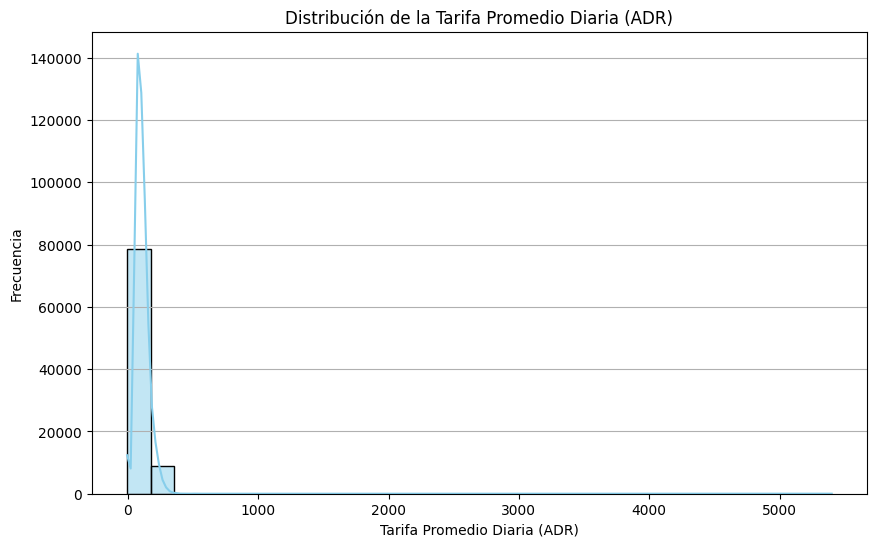

C:\Users\chave\AppData\Local\Temp\ipykernel_19976\3327172137.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='adr', data=df_box, palette='Set2')


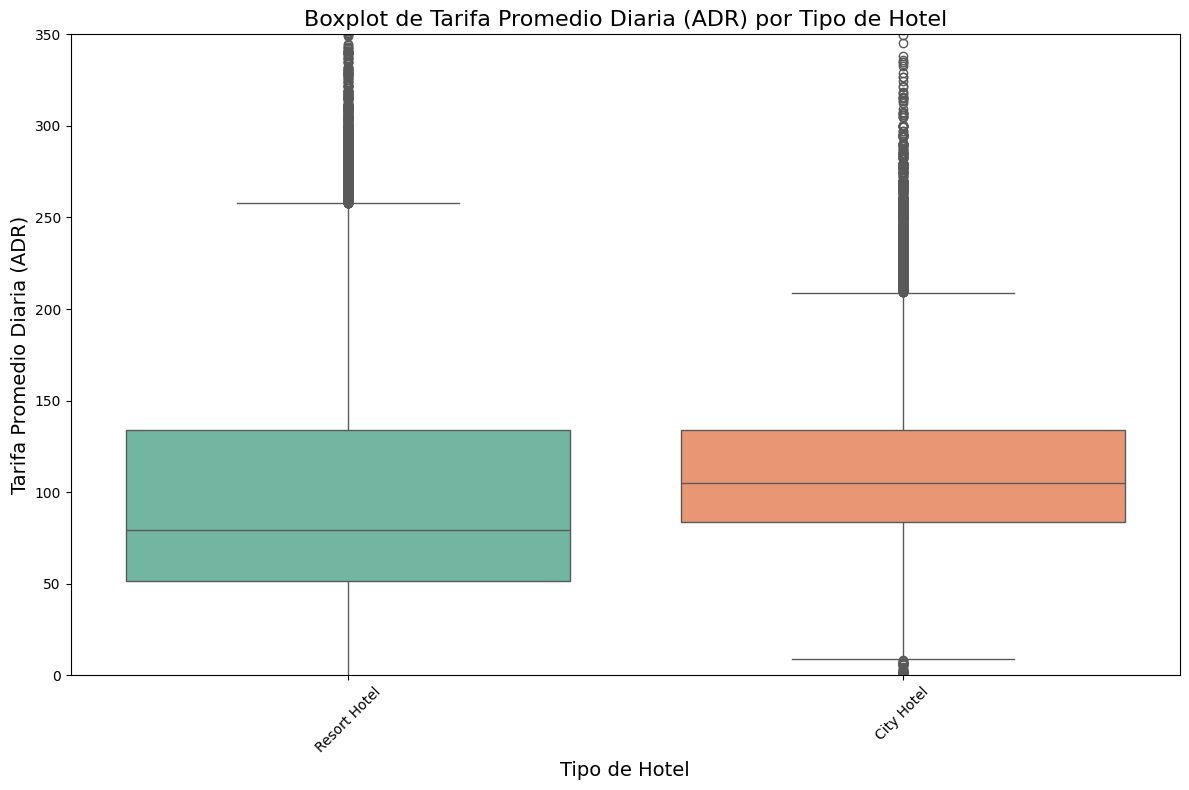

In [307]:
# 1. Histograma de adr
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la Tarifa Promedio Diaria (ADR)')
plt.xlabel('Tarifa Promedio Diaria (ADR)')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

# Interpretación del histograma:
# El histograma muestra la distribución de la tarifa promedio diaria. La mayoría de los valores se concentran en un rango bajo,
# lo que sugiere que la mayoría de las reservas tienen tarifas más asequibles. Sin embargo, hay una tendencia hacia tarifas más altas,
# indicando que algunas personas llegan a pagar mucho mas por una habitacion.

# 2.Boxplot de adr
# Filtrar filas sin valores nulos en las columnas relevantes
df_box = df[['hotel', 'adr']].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el boxplot usando seaborn
sns.boxplot(x='hotel', y='adr', data=df_box, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Boxplot de Tarifa Promedio Diaria (ADR) por Tipo de Hotel', fontsize=16)
plt.xlabel('Tipo de Hotel', fontsize=14)
plt.ylabel('Tarifa Promedio Diaria (ADR)', fontsize=14)
# Ajustar los límites del eje Y para hacer zoom
plt.ylim(0, 350)  # Ajusta este rango para observar mejor el grafico
# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Interpretación del boxplot:
# En este boxplot se puede observar como varía la tarifa promedio diaria (ADR) entre los diferentes tipos de hotel.
# Se logra apreciar la mediana, los cuartiles y los valores atípicos, lo que permite comparar la distribución de las tarifas entre el "City Hotel" y el "Resort Hotel".

### **Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

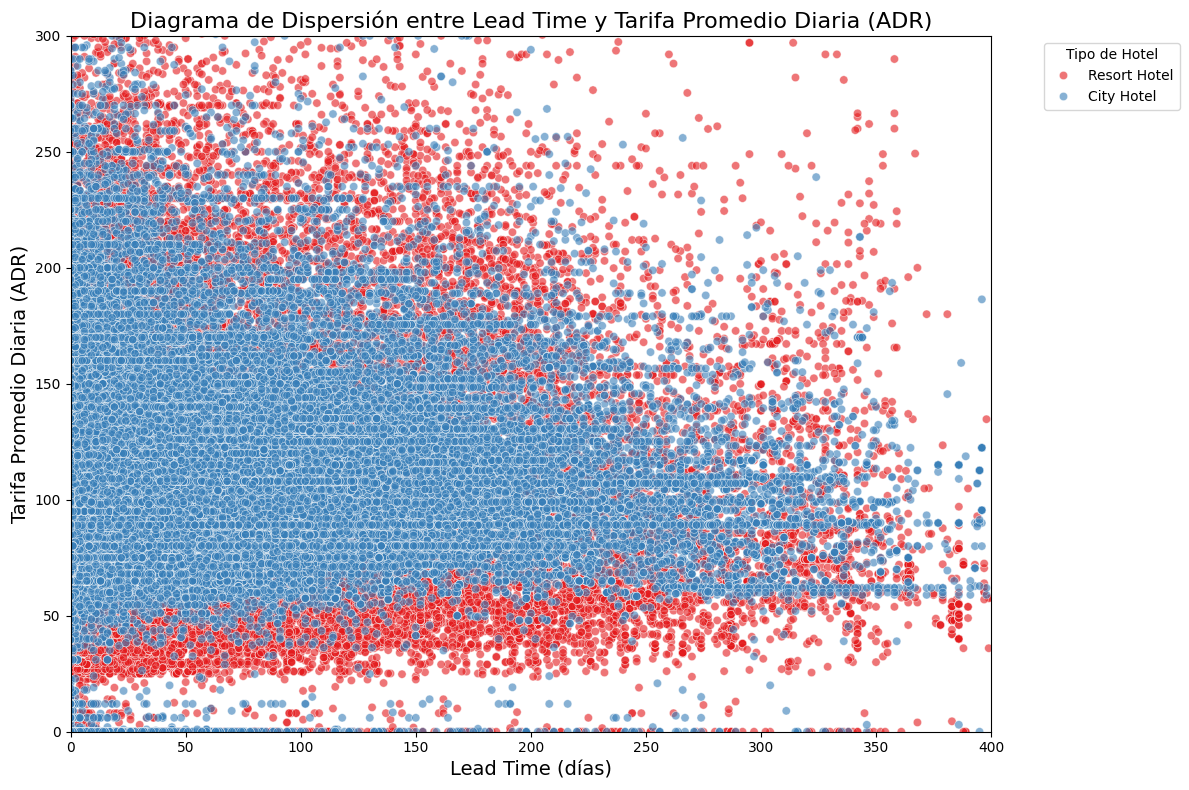

In [308]:
# 1. Gráfico de dispersión de lead_time y adr
# Filtrar filas sin valores nulos en las columnas relevantes
df_scatter_hotel = df[['lead_time', 'adr', 'hotel']].dropna()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el diagrama de dispersión usando seaborn
sns.scatterplot(x='lead_time', y='adr', hue='hotel', data=df_scatter_hotel, alpha=0.6, palette='Set1')

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión entre Lead Time y Tarifa Promedio Diaria (ADR)', fontsize=16)
plt.xlabel('Lead Time (días)', fontsize=14)
plt.ylabel('Tarifa Promedio Diaria (ADR)', fontsize=14)

# Ajustar los límites del eje X e Y para hacer zoom
plt.xlim(0, 400)  # Ajusta este rango para observar mejor el grafico
plt.ylim(0, 300)  # Ajusta este rango para observar mejor el grafico

# Mostrar la leyenda
plt.legend(title='Tipo de Hotel', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

# Interpretación del gráfico:
# Este diagrama de dispersión muestra la relación entre el tiempo de antelación de la reserva y la tarifa promedio diaria (ADR).
# Se puede observar si hay una tendencia a que un mayor lead time se asocie con tarifas más altas, y cómo se distribuyen
# los puntos entre los diferentes tipos de hotel.

### **Análisis adicional:
Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.

In [309]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nColumnas numéricas identificadas:")
print(columnas_numericas)


Columnas numéricas identificadas:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [310]:
def calcular_estadisticas(column, data): #Fuente: clases/ds-fundamentals/pruebas-resueltas/videojuegos.ipynb
    """
    Calcula estadísticas descriptivas para una columna numérica,
    omitiendo los valores nulos.

    Parámetros:
    - column (str): Nombre de la columna.
    - data (pd.Series): Serie de pandas con los datos de la columna.

    Retorna:
    - dict: Diccionario con las estadísticas calculadas.
    """
    estadisticas = {
        'Cuenta': int(np.sum(~np.isnan(data))),
        'Media': np.nanmean(data),
        'Mediana': np.nanmedian(data),
        'Desviación Estándar': np.nanstd(data, ddof=1),
        'Mínimo': np.nanmin(data),
        'Máximo': np.nanmax(data),
        '25% Percentil': np.nanpercentile(data, 25),
        '75% Percentil': np.nanpercentile(data, 75)
    }
    return estadisticas

# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in columnas_numericas:
    datos_columna = df[columna].values
    estadisticas = calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
is_canceled,87396.0,0.27,0.0,0.45,0.00,1.0,0.0,1.0
lead_time,87396.0,79.89,49.0,86.05,0.00,737.0,11.0,125.0
arrival_date_year,87396.0,2016.21,2016.0,0.69,2015.00,2017.0,2016.0,2017.0
arrival_date_week_number,87396.0,26.84,27.0,13.67,1.00,53.0,16.0,37.0
arrival_date_day_of_month,87396.0,15.82,16.0,8.84,1.00,31.0,8.0,23.0
stays_in_weekend_nights,87396.0,1.01,1.0,1.03,0.00,19.0,0.0,2.0
stays_in_week_nights,87396.0,2.62,2.0,2.04,0.00,30.0,1.0,4.0
adults,87396.0,1.88,2.0,0.63,0.00,55.0,2.0,2.0
children,87396.0,0.14,0.0,0.46,0.00,10.0,0.0,0.0
babies,87396.0,0.01,0.0,0.11,0.00,10.0,0.0,0.0


### **Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

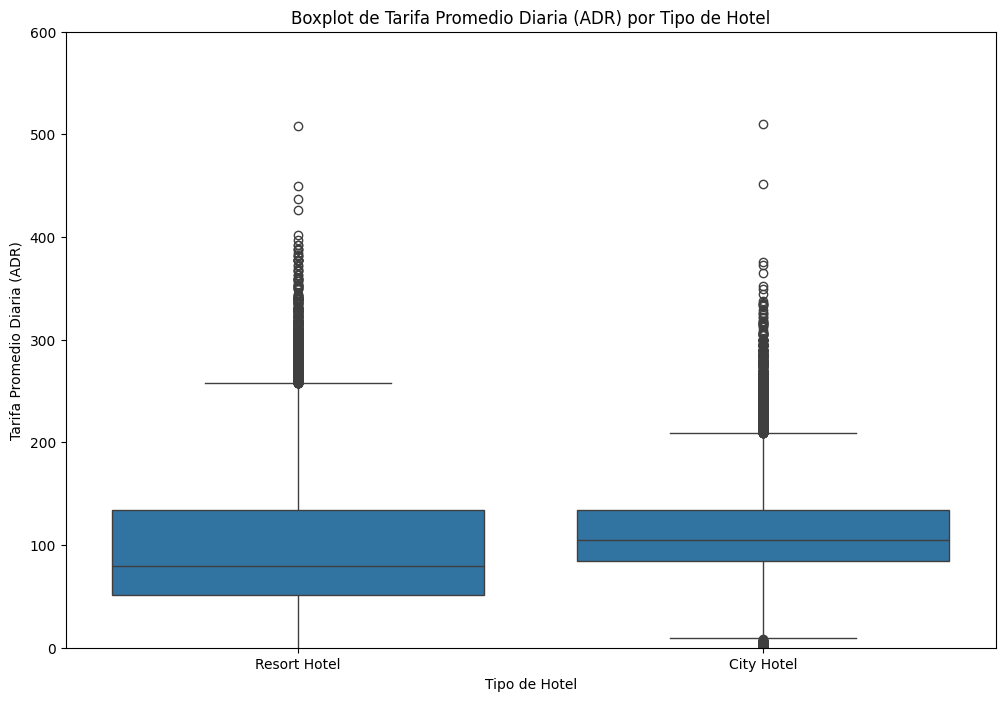

In [311]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('Boxplot de Tarifa Promedio Diaria (ADR) por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Tarifa Promedio Diaria (ADR)')
# Ajustar los límites del eje Y para hacer zoom
plt.ylim(0, 600)  # Ajusta este rango para observar mejor el grafico
plt.show()

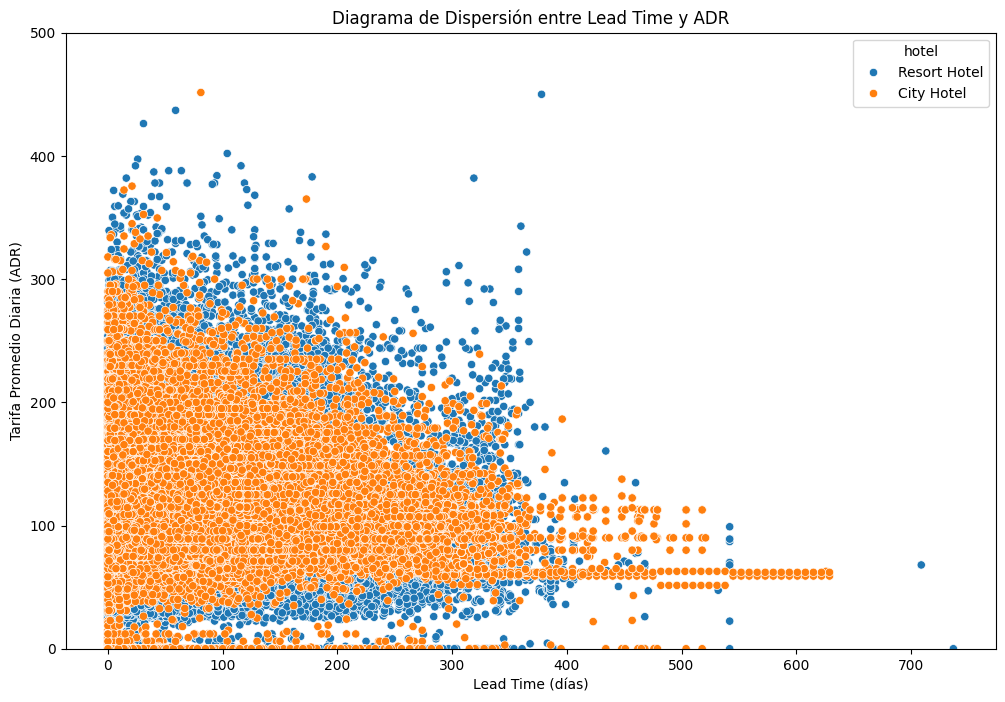

In [312]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='lead_time', y='adr', hue='hotel', data=df)
plt.title('Diagrama de Dispersión entre Lead Time y ADR')
plt.xlabel('Lead Time (días)')
plt.ylabel('Tarifa Promedio Diaria (ADR)')
# Ajustar los límites del eje Y para hacer zoom
plt.ylim(0, 500)  # Ajusta este rango para observar mejor el grafico
plt.show()